## Pre-processing ##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import *
from sklearn import metrics

df = pd.read_csv('/content/drive/Shared drives/BA476/data/application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# changing the categorical numbers 
# dropping sk_id_curr
df = df.drop(labels = "SK_ID_CURR", axis = 1)
df["DAYS_BIRTH"] = df["DAYS_BIRTH"]*-1
df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"]*-1
df["DAYS_REGISTRATION"] = df["DAYS_REGISTRATION"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1

In [ ]:
#Dropping Mode and Medi columns
columns_to_drop = ['APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE']
df.drop(columns_to_drop, inplace=True, axis=1)

In [ ]:
#Outliers for Income and Loan Size
cols = ['AMT_CREDIT', 'AMT_INCOME_TOTAL']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
cat_col = df.select_dtypes(object)
num_col = df.select_dtypes(np.number)
df.shape[1]

88

# Adding Dummies

In [ ]:
# getting dummies for categorical columns
cat_col_dummies = pd.get_dummies(cat_col)

df_with_dummies = df.copy() # new df

# dropping all old cat columns
labels = list(cat_col.columns)
for l in labels:
  df_with_dummies.drop(labels=l, axis=1, inplace=True)

# adding in dummies 
df_with_dummies = df_with_dummies.join(cat_col_dummies)
df_with_dummies.head(15)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,13778,3130,1213.0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,20099,-365243,7427.0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,14469,2019,14437.0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,112500.000,652500.0,21177.0,652500.0,0.022800,10197,679,4427.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Function to calculate meta-data to identify % of data is missing in each column
def missingData_toPercent(data):
    total = data.isnull().sum()
    print(total)
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [ ]:
# checking percentage of nan values 
missing_values_percentage_df_dummies = missingData_toPercent(df_with_dummies)
missing_values_percentage_df_dummies.head(20)

TARGET                                  0
CNT_CHILDREN                            0
AMT_INCOME_TOTAL                        0
AMT_CREDIT                              0
AMT_ANNUITY                            12
                                       ..
ORGANIZATION_TYPE_Transport: type 2     0
ORGANIZATION_TYPE_Transport: type 3     0
ORGANIZATION_TYPE_Transport: type 4     0
ORGANIZATION_TYPE_University            0
ORGANIZATION_TYPE_XNA                   0
Length: 200, dtype: int64


,Total,Percent,Unique,Data_Type
COMMONAREA_AVG,203775,70.574850,3047,float64
NONLIVINGAPARTMENTS_AVG,202572,70.158207,367,float64
LIVINGAPARTMENTS_AVG,199508,69.097030,1801,float64
FLOORSMIN_AVG,198097,68.608348,285,float64
OWN_CAR_AGE,194545,67.378159,62,float64
YEARS_BUILD_AVG,194272,67.283609,149,float64
LANDAREA_AVG,173535,60.101615,3477,float64
BASEMENTAREA_AVG,171430,59.372576,3717,float64
EXT_SOURCE_1,164244,56.883797,107581,float64
NONLIVINGAREA_AVG,161900,56.071983,3153,float64


In [ ]:
# making new df with columns with more than 60% NaN
drop_columns = list(missing_values_percentage_df_dummies[missing_values_percentage_df_dummies["Percent"] > 60].index)
df_with_dummies_drop_nan = df_with_dummies.drop(labels = drop_columns, axis = 1) # dropped 16 columns
df_with_dummies_drop_nan

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,236,8456.0,...,0,0,0,0,0,0,0,0,0,0
307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,-365243,4388.0,...,0,0,0,0,0,0,0,0,0,1
307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,7921,6737.0,...,0,0,0,0,0,0,0,0,0,0
307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,4786,2562.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df with only drop columns 
drop_columns_df = df_with_dummies[drop_columns + ["TARGET"]]
drop_columns_df

,COMMONAREA_AVG,NONLIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,FLOORSMIN_AVG,OWN_CAR_AGE,YEARS_BUILD_AVG,LANDAREA_AVG,TARGET
0,0.0143,0.0000,0.0202,0.1250,NaN,0.6192,0.0369,1
1,0.0605,0.0039,0.0773,0.3333,NaN,0.7960,0.0130,0
2,NaN,NaN,NaN,NaN,26.0,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
307506,0.0202,0.0753,0.1484,0.2708,NaN,0.8300,0.0594,0
307507,0.0022,0.0000,0.0202,0.1250,NaN,0.6260,0.0579,0
307508,0.0123,0.0000,0.0841,0.2083,NaN,0.7484,NaN,0
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


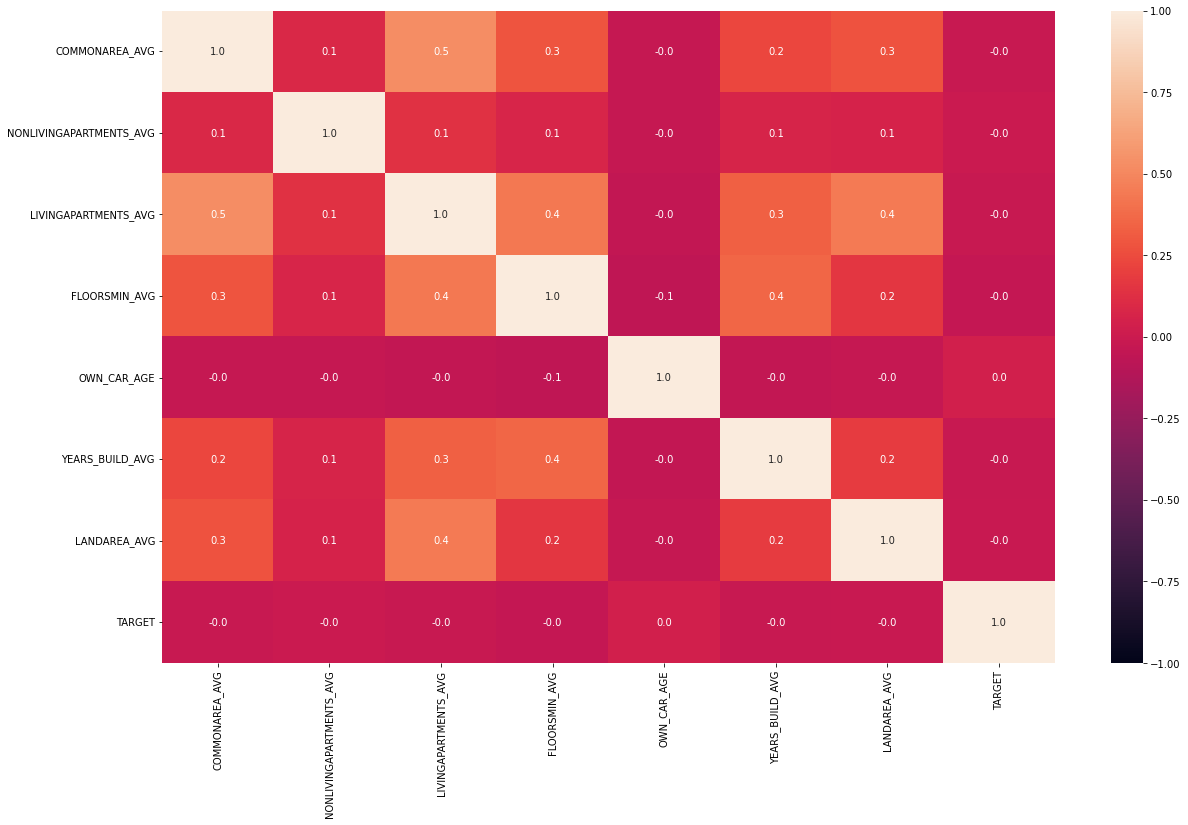

In [ ]:
# heat map with df with only dropped columns
drop_columns_corr = drop_columns_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(drop_columns_corr, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

# Filling in NaN values


In [ ]:
for c in df_with_dummies_drop_nan.columns:
  df_with_dummies_drop_nan[c].fillna(value = df_with_dummies_drop_nan[c].mean(), inplace=True)
df_with_dummies_drop_nan.isna().sum()

TARGET                                 0
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
AMT_CREDIT                             0
AMT_ANNUITY                            0
                                      ..
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
ORGANIZATION_TYPE_XNA                  0
Length: 193, dtype: int64

# Heatmaps of dropped null columns

In [ ]:
# # heat map with df without dropped columns 0-30
# df_corr = df_without_target.iloc[:,:31].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_30 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 30 Predictors")
# sns.heatmap(df_corr_30, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [ ]:
# # heat map with df without dropped columns 31-60
# df_corr = df_without_target.iloc[:, 31:61].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_60 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 30-60 Predictors")
# sns.heatmap(df_corr_60, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [ ]:
# # heat map with df without dropped columns 61-90
# df_corr = df_without_target.iloc[:, 61:89].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_90 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 60-90 Predictors")
# sns.heatmap(df_corr_90, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [ ]:
# # heat map with df without dropped columns 90-120
# df_corr = df_without_target.iloc[:, 91:121].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_120 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 90-120 Predictors")
# sns.heatmap(df_corr_120, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [ ]:
# # heat map with df without dropped columns 120-150
# df_corr = df_without_target.iloc[:, 121:151].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_150 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 120-150 Predictors")
# sns.heatmap(df_corr_150, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [ ]:
# # heat map with df without dropped columns 150-180
# df_corr = df_without_target.iloc[:, 151:181].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_180 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 150-180 Predictors")
# sns.heatmap(df_corr_180, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [ ]:
# # heat map with df without dropped columns 180-210
# df_corr = df_without_target.iloc[:, 181:211].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_210 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 180-210 Predictors")
# sns.heatmap(df_corr_210, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [ ]:
# # heat map with df without dropped columns 210-229
# df_corr = df_without_target.iloc[:, 211:230].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_229 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 210-229 Predictors")
# sns.heatmap(df_corr_229, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

# NearMiss Sampling

In [ ]:
official_df = df_with_dummies_drop_nan.sample(n=20000)

In [ ]:
y = official_df["TARGET"]
X = official_df.drop(labels="TARGET", axis=1)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
nm = NearMiss(sampling_strategy=0.2)
X_under, y_under = nm.fit_resample(X, y)

In [ ]:
# from imblearn.over_sampling import SMOTE #SMOTE BAD
# sm = SMOTE(random_state=42)
# X_res2, y_res2 = sm.fit_resample(X, y)

PCA 

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn import preprocessing
# pca_df_scaled = preprocessing.scale(official_df)
# pcs = PCA(n_components=40)
# pcs.fit(pca_df_scaled)
# pcsSummary_df = pd.DataFrame({
#             '% of variance explained': pcs.explained_variance_ratio_,
#             'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
#              })
# pcsSummary_df.round(3)

In [ ]:
# pcs_df = pd.DataFrame(pcs.components_).round(2).transpose()
# var = list(official_df.columns)
# pcs_df.index = [var]
# pcs_df.head(50)

In [ ]:
# pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)
# eig=pcs.explained_variance_.round(2)
# print(eig)

In [ ]:
# xvals = np.arange(1,41,step=1);

# plt.figure(figsize=(10,5))

# plt.plot(xvals, eig, 'ro-', linewidth=1)

# plt.xticks(xvals)

# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Eigenvalue')

# plt.axhline(y=1, color='b', linestyle='--')

In [ ]:
# pcs = PCA(n_components=20)
# principalComponents = pcs.fit_transform(pca_df_scaled)
# principalDF = pd.DataFrame(
#         principalComponents.round(3), 
#         columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19','F20']
#         )
# principalDF

In [ ]:
# principalDF.corr().round(4)

# Split into train/test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_norm = MinMaxScaler(feature_range = (0,1))
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 1)
scaler = StandardScaler() 
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.fit_transform(X_test)
X_std_train = scaler_norm.fit_transform(X_train)
X_std_test = scaler_norm.fit_transform(X_test)

# Logistic Regression

In [ ]:
# Logistic regression test
lr = LogisticRegression(max_iter=1000, penalty ='none')
lr.fit(X_std_train, y_train)

lr_y_train_pred = lr.predict(X_std_train) 
lr_y_test_pred = lr.predict(X_std_test)

lr_train_accuracy_score = accuracy_score(y_train, lr_y_train_pred)
lr_test_accuracy_score = accuracy_score(y_test, lr_y_test_pred)

print("LR Training set accuracy: ", lr_train_accuracy_score)
print("LR Test set accuracy: ", lr_test_accuracy_score)

LR Training set accuracy:  0.8406379505211604
LR Test set accuracy:  0.8382722250125565


Text(0.5, 1.0, 'Test Accuracy Score: 0.8382722250125565')

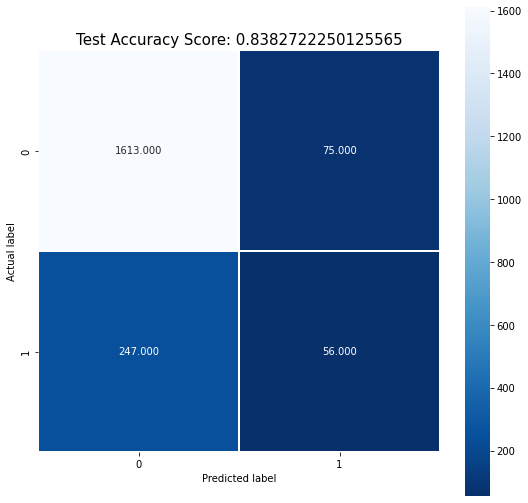

In [ ]:
#Logisitic Regression Confusion Matrix
lr_cm = metrics.confusion_matrix(y_test, lr_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(lr_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(lr_test_accuracy_score)
plt.title(all_sample_title, size = 15)

In [ ]:
p_pred = lr.predict_proba(X_std_test)[:,1]
np.round(p_pred, 3)
cutoff = .2
lr_cutoff_y_pred = [1 if i > cutoff else 0 for i in p_pred]
lr_cutoff_cm = confusion_matrix(y_test, lr_cutoff_y_pred)
lr_cutoff_accuracy_score = accuracy_score(y_test, lr_cutoff_y_pred)
print("Cutoff Logistic Reg accuracy: ", lr_cutoff_accuracy_score)

Cutoff Logistic Reg accuracy:  0.7182320441988951


Text(0.5, 1.0, 'Test Accuracy Score: 0.7182320441988951')

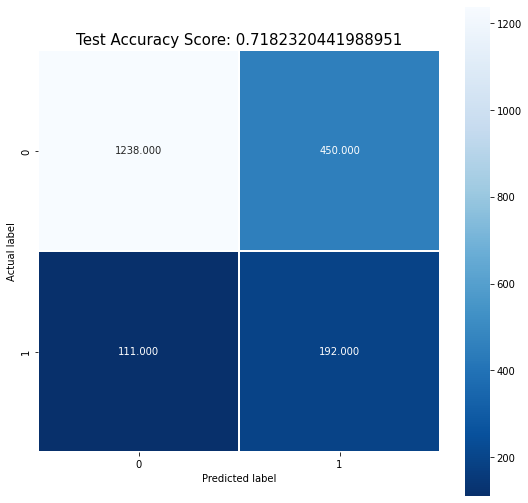

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(lr_cutoff_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(lr_cutoff_accuracy_score)
plt.title(all_sample_title, size = 15)

In [ ]:
#Logistic Regression CV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = dict(max_iter=[1e-5, 1e-4, 1e-3,50,100,200,300,400,1000],penalty=['none'])
clf = RandomizedSearchCV(lr, distributions, scoring='accuracy', random_state=0)
search = clf.fit(X_std_train, y_train)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

{'max_iter': 200, 'penalty': 'none'}

In [ ]:
# Logistic regression with CV parameters
lr = LogisticRegression(max_iter=1000, penalty ='none')
lr.fit(X_std_train, y_train)

lr_y_train_pred = lr.predict(X_std_train) 
lr_y_test_pred = lr.predict(X_std_test)

lr_train_accuracy_score = accuracy_score(y_train, lr_y_train_pred)
lr_test_accuracy_score = accuracy_score(y_test, lr_y_test_pred)

print("LR Training set accuracy: ", lr_train_accuracy_score)
print("LR Test set accuracy: ", lr_test_accuracy_score)

LR Training set accuracy:  0.8406379505211604
LR Test set accuracy:  0.8382722250125565


# Bagging

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error
from IPython.display import clear_output, display
from scipy.stats import randint
from scipy.stats import uniform


In [ ]:
num_trees = 30 
max_depth = 10

regr_1 = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=max_depth),
        n_estimators=num_trees
)
regr_1.fit(X_std_train, y_train)

bagging_y_test_pred = regr_1.predict(X_std_test)
bagging_y_train_pred = regr_1.predict(X_std_train)

print('Bagging Train Accuracy: ', accuracy_score(y_train, bagging_y_train_pred))
print('Bagging Test Accuracy: ', accuracy_score(y_test, bagging_y_test_pred))

Bagging Train Accuracy:  0.8949585036541559
Bagging Test Accuracy:  0.841505695889054


In [ ]:
#Bagging CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth' : uniform(loc=0, scale=50),
    'max_samples' : [0.05, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4]
}

clf_bagging = RandomizedSearchCV(BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=uniform(loc=0, scale=50)),
        n_estimators=num_trees, max_features = 1),
                   param_grid, cv= 5)

search_bagging = clf_bagging.fit(X_std_train, y_train)
print(search_bagging.best_params_, search_bagging.best_score_)

{'base_estimator__max_depth': 45.21992646292338, 'max_samples': 0.05} 0.8317850388051914


Text(0.5, 1.0, 'Test Accuracy Score: 0.841505695889054')

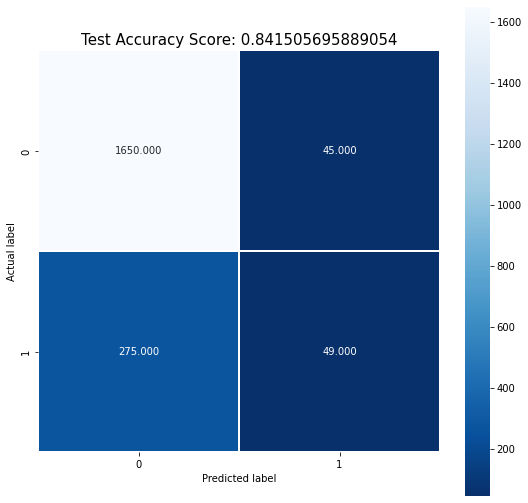

In [ ]:
# creating the Bagging confusion matrix 
bagging_cm = metrics.confusion_matrix(y_test, bagging_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(bagging_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test, bagging_y_test_pred))
plt.title(all_sample_title, size = 15)

In [ ]:
# Bagging with CV paramaters
num_trees = 30 
max_depth = 20.140287910250613

regr_1 = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=max_depth),
        n_estimators=num_trees,
        max_samples= 4
)
regr_1.fit(X_std_train, y_train)

bagging_y_test_pred = regr_1.predict(X_std_test)
bagging_y_train_pred = regr_1.predict(X_std_train)

print('Bagging Train Accuracy: ', accuracy_score(y_train, bagging_y_train_pred))
print('Bagging Test Accuracy: ', accuracy_score(y_test, bagging_y_test_pred))

Bagging Train Accuracy:  0.8317849622197449
Bagging Test Accuracy:  0.8395245170876672


# Boosting

In [ ]:

residuals = y_train
model = AdaBoostClassifier(n_estimators=50)
model.fit(X_std_train, residuals)
boosting_y_test_pred = model.predict(X_std_test)
boosting_y_train_pred = model.predict(X_std_train)

print('Boosting Train accuracy: ',accuracy_score(y_train, boosting_y_train_pred))
print('Boosting Test accuracy: ', accuracy_score(y_test, boosting_y_test_pred))

Boosting Train accuracy:  0.8488789793137619
Boosting Test accuracy:  0.8410104011887073


Text(0.5, 1.0, 'Test Accuracy Score: 0.8410104011887073')

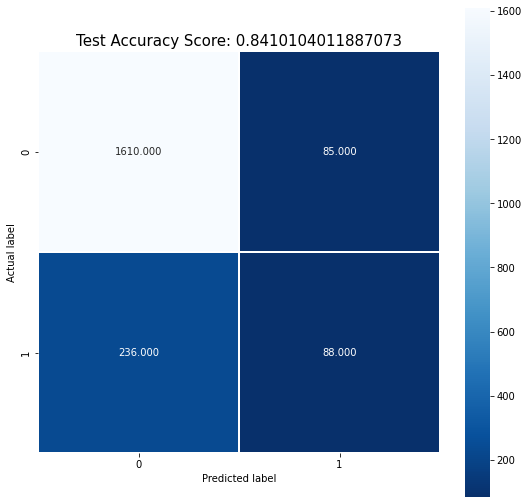

In [ ]:
# Boosting confusion matrix 
boosting_cm = metrics.confusion_matrix(y_test, boosting_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(boosting_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test, boosting_y_test_pred))
plt.title(all_sample_title, size = 15)

In [ ]:
boosting_y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Boosting CV

param_grid = {
    # 'base_estimator' : DecisionTreeClassifier(max_depth=1), Logistic Regressoruniform(loc=0, scale=50),
    # 'max_samples' : [0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'n_estimators' : randint(10, 500)
}


clf_boosting = RandomizedSearchCV(model,param_grid, cv= 5)

search_boosting = clf_boosting.fit(X_std_train, y_train)
print(search_boosting.best_params_, search_boosting.best_score_)


In [ ]:
# boosting with cv parameters
residuals = y_train
model = AdaBoostClassifier(n_estimators=260, learning_rate=0.5)
model.fit(X_std_train, residuals)
boosting_y_test_pred = model.predict(X_std_test)
boosting_y_train_pred = model.predict(X_std_train)

print('Boosting Train accuracy: ',accuracy_score(y_train, boosting_y_train_pred))
print('Boosting Test accuracy: ', accuracy_score(y_test, boosting_y_test_pred))

Boosting Train accuracy:  0.858169205995293
Boosting Test accuracy:  0.8375433382862804


# Lasso, Ridge, Elastic Net

In [ ]:
# Lasso - Classification
lasso = LogisticRegression(solver = "liblinear", penalty="l1", max_iter=1000)
lasso.fit(X_std_train, y_train)

lasso_y_train_pred = lasso.predict(X_std_train) 
lasso_y_test_pred = lasso.predict(X_std_test)

lasso_train_accuracy_score = accuracy_score(y_train, lasso_y_train_pred)
lasso_test_accuracy_score = accuracy_score(y_test, lasso_y_test_pred)

print("Lasso Training set accuracy: ", lasso_train_accuracy_score)
print("Lasso Test set accuracy: ", lasso_test_accuracy_score)

Lasso Training set accuracy:  0.8421900161030595
Lasso Test set accuracy:  0.8449727587914809


Text(0.5, 1.0, 'Test Accuracy Score: 0.8449727587914809')

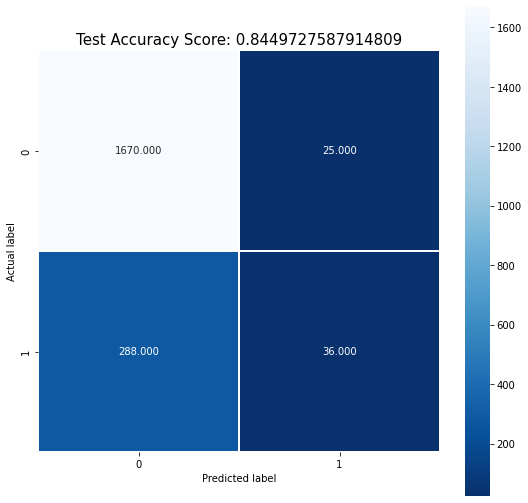

In [ ]:
# Lasso confusion matrix 
lasso_cm = metrics.confusion_matrix(y_test, lasso_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(lasso_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test, lasso_y_test_pred))
plt.title(all_sample_title, size = 15)

In [ ]:
#Lasso CV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions_lasso= dict(C=[.00001, .0001, .001, .01, .1, 1, 2, 5, 10, 100],penalty=['l1'])
clf_lasso = RandomizedSearchCV(lasso, distributions_lasso, random_state=0)
search_lasso = clf_lasso.fit(X_std_train, y_train)
search_lasso.best_params_

{'C': 1, 'penalty': 'l1'}

In [ ]:
# Ridge - Classification
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha=0.01)
ridge.fit(X_std_train, y_train)

ridge_y_test_pred = ridge.predict(X_std_test)
ridge_y_train_pred = ridge.predict(X_std_train)

ridge_train_accuracy_score = accuracy_score(y_train, ridge_y_train_pred)
ridge_test_accuracy_score = accuracy_score(y_test, ridge_y_test_pred)

print("Ridge Train Accuracy: ", ridge_train_accuracy_score)
print("Ridge Test Accuracy: " , ridge_test_accuracy_score)

Ridge Train Accuracy:  0.8392171435649697
Ridge Test Accuracy:  0.8395245170876672


Text(0.5, 1.0, 'Test Accuracy Score: 0.8395245170876672')

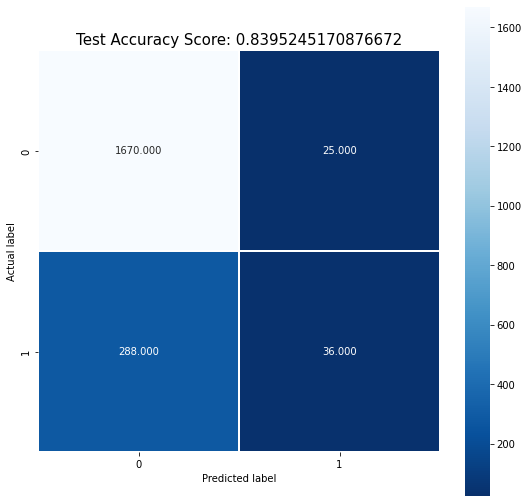

In [ ]:
# Ridge confusion matrix 
ridge_cm = metrics.confusion_matrix(y_test, lasso_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(ridge_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test, ridge_y_test_pred))
plt.title(all_sample_title, size = 15)

In [ ]:
#Ridge CV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions_ridge = dict(C=[.00001, .0001, .001, .01, .1, 1, 2, 5, 10, 100],penalty=['l2'])
clf_es = RandomizedSearchCV(ridge, distributions_ridge, random_state=0)
search_ridge = clf_es.fit(X_std_train, y_train)
search_ridge.best_params_

Ridge_v2 Training set accuracy:  0.8415706676576242
Ridge_v2 set accuracy:  0.8444774640911342


Text(0.5, 1.0, 'Test Accuracy Score: 0.8444774640911342')

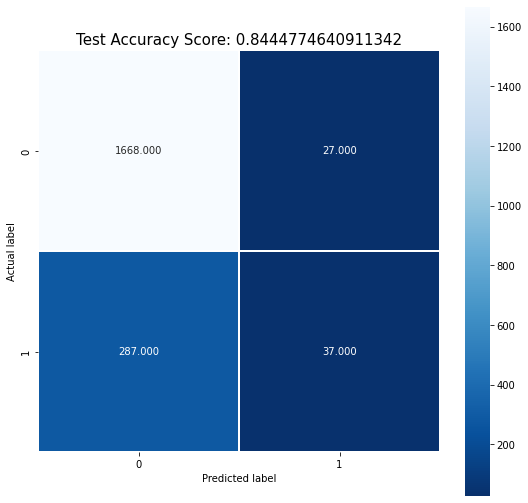

In [ ]:
# Ridge V2 Using Logistic Regression - Classification
ridge_v2 = LogisticRegression(solver = "liblinear", penalty="l2", max_iter=1000)
ridge_v2.fit(X_std_train, y_train)

ridge_v2_y_train_pred = ridge_v2.predict(X_std_train) 
ridge_v2_y_test_pred = ridge_v2.predict(X_std_test)

ridge_v2_train_accuracy_score = accuracy_score(y_train, ridge_v2_y_train_pred)
ridge_v2_test_accuracy_score = accuracy_score(y_test, ridge_v2_y_test_pred)

print("Ridge_v2 Training set accuracy: ", ridge_v2_train_accuracy_score)
print("Ridge_v2 set accuracy: ", ridge_v2_test_accuracy_score)
# Lasso confusion matrix 
ridge_v2_cm = metrics.confusion_matrix(y_test, ridge_v2_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(ridge_v2_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test, ridge_v2_y_test_pred))
plt.title(all_sample_title, size = 15)

In [ ]:
distributions_ridge = dict(C=[.00001, .0001, .001, .01, .1, 1, 2, 5, 10, 20, 50, 100],penalty=['l2'])
clf_es = RandomizedSearchCV(ridge_v2, distributions_ridge, random_state=0)
search_ridge = clf_es.fit(X_std_train, y_train)
search_ridge.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
#ElasticNet
from sklearn.linear_model import SGDClassifier
elasticnet = SGDClassifier(loss="log", penalty="elasticnet", alpha=.0001)
elasticnet.fit(X_std_train, y_train)

elasticnet_y_test_pred = elasticnet.predict(X_std_test)
elasticnet_y_train_pred = elasticnet.predict(X_std_train)

elasticnet_train_accuracy_score = accuracy_score(y_train, elasticnet_y_train_pred)
elasticnet_test_accuracy_score = accuracy_score(y_test, elasticnet_y_test_pred)

print("Ridge Train Accuracy: ", elasticnet_train_accuracy_score)
print("Ridge Test Accuracy: " , elasticnet_test_accuracy_score)

Ridge Train Accuracy:  0.8409513192121888
Ridge Test Accuracy:  0.8494304110946013


Text(0.5, 1.0, 'Test Accuracy Score: 0.8494304110946013')

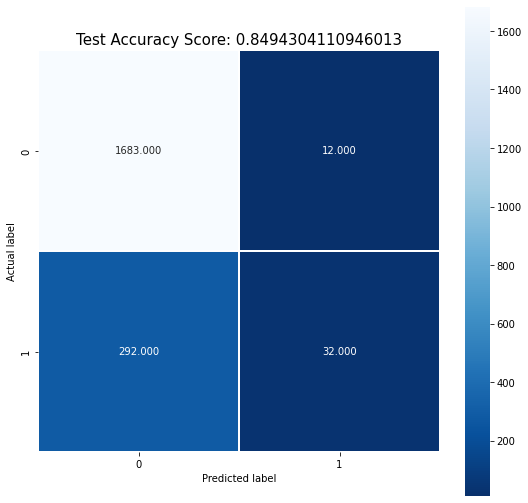

In [ ]:
# ElasticNet confusion matrix 
elasticnet_cm = metrics.confusion_matrix(y_test, elasticnet_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(elasticnet_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test, elasticnet_y_test_pred))
plt.title(all_sample_title, size = 15)

In [ ]:
#Elastic CV
distributions_es = dict(penalty=['elasticnet'], alpha=[.00001, .0001, .001, .01, .1, 1, 2, 5, 10, 20, 50, 100])
clf_es = RandomizedSearchCV(elasticnet, distributions_es, random_state=0)
search_es = clf_es.fit(X_std_train, y_train)
search_es.best_params_

{'alpha': 0.0001, 'penalty': 'elasticnet'}

# Decision Tree

In [ ]:
DT_model = DecisionTreeClassifier()

In [ ]:
DT_model.fit(X_std_train, y_train)

DecisionTreeClassifier()

In [ ]:
#check accuracy
#overfitting
print(f'Train Accuracy - : {DT_model.score(X_std_train, y_train):.3f}')
print(f'Test Accuracy - : {DT_model.score(X_std_test, y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.712


In [ ]:
#install graphviz and pydot for vizualization
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(DT_model, max_depth = 3,
                           out_file = None,
                           feature_names = X.columns,
                           class_names = ['Declined', 'Approved'],
                           filled = True, rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
# creating the confusion matrix
y_pred_no_cv = DT_model.predict(X_std_test)
plt.figure(figsize=(9,9))

confusion_matrix_1 = metrics.confusion_matrix(y_test, y_pred_no_cv)
sns.heatmap(confusion_matrix_1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred_no_cv ))
plt.title(all_sample_title, size = 15)

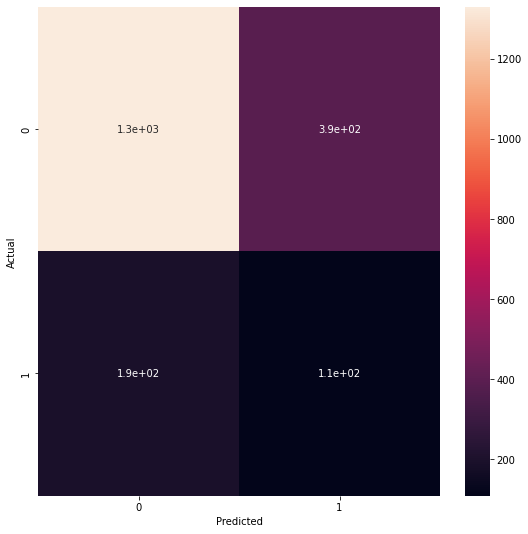

In [ ]:
# creating the confusion matrix 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
y_pred_no_cv = DT_model.predict(X_std_test)
confusion_matrix_1 = pd.crosstab(y_test, y_pred_no_cv, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_1, annot=True)
plt.show()

**Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
tune_para = {'max_depth' : list(range(3,50)),
            'criterion' : ('gini', 'entropy'),
            'max_features' : ('auto', 'sqrt', 'log2'),
            'min_samples_split' : list(range(1, 282))
             }

In [ ]:
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = tune_para, cv = 5, verbose = True)

In [ ]:
DT_grid.fit(X_std_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29, 30, 31, 32, ...],
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                      

In [ ]:
DT_grid.best_estimator_

DecisionTreeClassifier(max_depth=37, max_features='log2', min_samples_split=234)

In [ ]:
#using parameter from tuning
DT_CVmodel = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_split=276)

DT_CVmodel.fit(X_std_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_split=276)

In [ ]:
print(f'Train Accuracy - : {DT_CVmodel.score(X_train, y_train):.3f}')
print(f'Test Accuracy - : {DT_CVmodel.score(X_test, y_test):.3f}')

Train Accuracy - : 0.668
Test Accuracy - : 0.664


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
dot_data = export_graphviz(DT_CVmodel, max_depth = 7,
                           out_file = None,
                           feature_names = X.columns,
                           class_names = ['Declined', 'Approved'],
                           filled = True, rounded = True,
                           special_characters = True)
graph_CV = graphviz.Source(dot_data)
graph_CV
#graph.render('Decision Tree After Tuning')

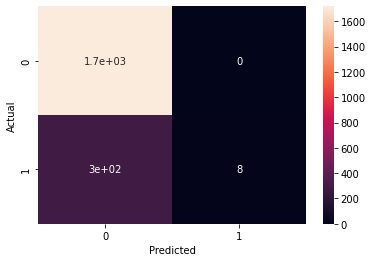

In [ ]:
# creating the confusion matrix 
y_pred_no_cv = DT_CVmodel.predict(X_std_test)
confusion_matrix_1 = pd.crosstab(y_test, y_pred_no_cv, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_1, annot=True)
plt.show()

# Visualizations

In [ ]:
corr_mat = df_with_dummies_drop_nan.corr()
corr_mat

In [ ]:
pd.set_option('max_columns', None)
print(df_with_dummies_drop_nan.columns.tolist())
df_visual = df_with_dummies_drop_nan.copy()

In [ ]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT'] 

Q1 = df_visual[cols].quantile(0.25)
Q3 = df_visual[cols].quantile(0.75)
IQR = Q3 - Q1

df_visual = df_visual[~((df_visual[cols] < (Q1 - 1.5 * IQR)) |(df_visual[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_visual = df_visual[~((df_visual[cols] < (Q1 - 1.5 * IQR)) |(df_visual[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
 
df_visual_scaled = scaler.fit_transform(df_visual)
df_visual_scaled = pd.DataFrame(scaler.transform(df_visual),
                                index = df_visual.index,
                                columns = df_visual.columns)

In [ ]:
y = df_visual_scaled["TARGET"]
X = df_visual_scaled.drop(labels="TARGET", axis=1)
X = X.iloc[:, 31:62]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [ ]:
df_visual_occup = df['OCCUPATION_TYPE']
df.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean().plot.bar(figsize = (18,8))
plt.ylabel("Annual Income")
plt.title("Average Income Based on Occupation")

In [ ]:
df.groupby(['OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE'])['TARGET'].mean().unstack('OCCUPATION_TYPE').plot.bar(figsize = (16,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylabel("Percentage of Default")
plt.xlabel("Occupation Type")
plt.title("Which Occupation is Most Likely to Default based on Cash and Revolving Loans")

In [ ]:
df_visual.groupby(['NAME_CONTRACT_TYPE_Revolving loans'])['TARGET'].mean().plot.bar()
plt.title("Percentage of Loans Defaulting Based on Type")
plt.xlabel("Type of Loan")
plt.ylabel("Percentage of Default")

In [ ]:
df_visual.boxplot(column = ['AMT_INCOME_TOTAL'], by = 'TARGET', figsize = (20,10))

In [ ]:
#df_sns = df.groupby(['OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE'])['TARGET'].mean()
#df_sns_frame = pd.DataFrame(df_sns)
#df_sns_frame = df_sns_frame.reset_index()
#sns_plot = sns.boxplot(x = 'OCCUPTION_TYPE', data = df_sns_frame, palette = 'Set3', kind = 'box')
#sns.catplot(x="TARGET", y='OCCUPATION_TYPE', kind="swarm", data=df,  height=8.27, aspect=16/8.27)


# Feature Engineering

In [ ]:
X_under_ft = X_under.copy()
X_under_ft['TARGET'] = y_under

mean 0.414713106212825
0.044461773135512646 3.283302063789869


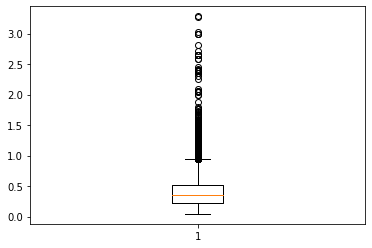

In [ ]:
fdf = pd.DataFrame()
fdf['threshold'] = X_under_ft['AMT_INCOME_TOTAL'] / X_under_ft['AMT_CREDIT']

fdf.head()
print("mean", fdf['threshold'].mean())
print(fdf['threshold'].min() , fdf['threshold'].max())

xx = fdf['threshold'].tolist()

plt.boxplot(xx)

plt.show()

In [ ]:
X_under_ft['threshold'] = fdf['threshold']

cols = ['threshold']

Q1 = X_under_ft[cols].quantile(0.25)
Q3 = X_under_ft[cols].quantile(0.75)
IQR = Q3 - Q1

X_under_ft = X_under_ft[~((X_under_ft[cols] < (Q1 - 1.5 * IQR)) |(X_under_ft[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
cols = ['threshold']

Q1 = fdf[cols].quantile(0.25)
Q3 = fdf[cols].quantile(0.75)
IQR = Q3 - Q1

fdf = fdf[~((fdf[cols] < (Q1 - 1.5 * IQR)) |(fdf[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(len(fdf), len(X_under_ft))

9412 9412


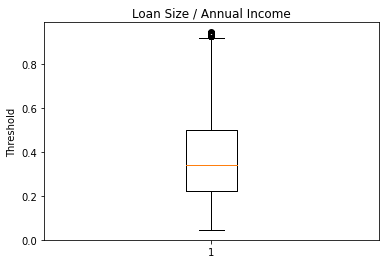

In [ ]:
xxx = fdf['threshold'].tolist()
plt.boxplot(xxx)
plt.ylabel('Threshold')
plt.title('Loan Size / Annual Income')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

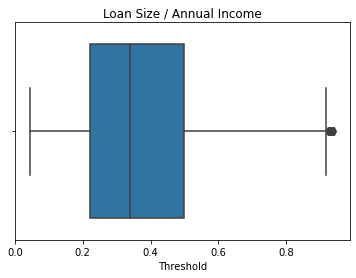

In [ ]:
thresh = sns.boxplot(xxx).set(xlabel = 'Threshold',title = 'Loan Size / Annual Income')
sns

In [ ]:
conditions = [(fdf['threshold'] > 0) & (fdf['threshold'] <= 0.2),
              (fdf['threshold'] > 0.2) & (fdf['threshold'] <= 0.3) ,
              (fdf['threshold'] > 0.3) & (fdf['threshold'] <= 0.4) ,
              (fdf['threshold'] > 0.4) & (fdf['threshold'] <= 0.5) ,
              (fdf['threshold'] > 0.5) & (fdf['threshold'] <= 0.6) ,
              (fdf['threshold'] > 0.6) & (fdf['threshold'] <= 0.7) ,
              (fdf['threshold'] > 0.7)       
]

choices = [1,2,3,4,5,6,7]

fdf['risk_rating'] = np.select(conditions, choices)

rate_conditions = [fdf['risk_rating'] == 1,
              fdf['risk_rating'] == 2 ,
              fdf['risk_rating'] == 3 ,
              fdf['risk_rating'] == 4 ,
              fdf['risk_rating'] == 5 ,
              fdf['risk_rating'] == 6 ,
              fdf['risk_rating'] == 7      
]

rate_choices = [0.05,0.06,0.07,0.08,0.09,0.10,0.12]

fdf['rates'] = np.select(rate_conditions, rate_choices)
fdf.head()

,threshold,risk_rating,rates
0,0.750000,7,0.12
1,0.247688,2,0.06
2,0.750000,7,0.12
3,0.625000,6,0.10
4,0.750000,7,0.12


In [ ]:
interest_rate = fdf['rates'].tolist()
risk_rating = fdf['risk_rating'].tolist()
default = X_under_ft['TARGET'].tolist()
credit = X_under_ft['AMT_CREDIT'].tolist()
cash_loan = X_under_ft['NAME_CONTRACT_TYPE_Cash loans'].tolist()
revolv_loan = X_under_ft['NAME_CONTRACT_TYPE_Revolving loans'].tolist()

profit= []
loss= []
rate = 0
diff = 0
discount = 0

for i in range(len(default)):
  if default[i] == 0:
    if cash_loan[i] == 0:
      rate = (1 + interest_rate[i]) ** 7
      diff = (credit[i] * rate) - credit[i]
      profit.append(diff / ((1.02)**7))
    elif cash_loan[i] == 1:
      rate = (1 + interest_rate[i]) ** 3
      diff = (credit[i] * (rate+0.015) - credit[i])
      profit.append(diff / ((1.02)**3))
  elif default[i] == 1:
    if cash_loan[i] == 0:
      diff = -0.3 * credit[i]
      loss.append(diff / ((1.02)**7))
    elif cash_loan[i] == 1:
      diff = -0.5 * credit[i]
      loss.append(diff / ((1.02)**3))
    
print(sum(profit) / len(profit), sum(loss) / len(loss))

110134.96422182745 -259498.03880702177


# Profit


In [ ]:
# make a new dataframe based on the y test/train values
def make_a_df(y_predicted, y_index): 
  idx = y_index.index # all indices 

  # getting all true, predicted, credit 
  everything_with_near_miss = X_under.copy()
  everything_with_near_miss['TARGET'] = y_under
  all_test_df = pd.DataFrame(everything_with_near_miss.iloc[idx])
  all_test_df['Predicted'] = y_predicted
  df2 = pd.DataFrame()
  df2['True'] = all_test_df['TARGET']
  df2['Predicted'] = all_test_df['Predicted']
  df2['Credit'] = all_test_df['AMT_CREDIT']
  df2['Income'] = all_test_df['AMT_INCOME_TOTAL']
  df2['Revolving'] = all_test_df['NAME_CONTRACT_TYPE_Revolving loans']
  df2['Cash'] = all_test_df['NAME_CONTRACT_TYPE_Cash loans']
  df2 = df2.sort_index()


  
  df2['threshold'] = df2['Credit'] / df2['Income']

  conditions = [(df2['threshold'] <= 1),    
                (df2['threshold'] > 1) & (df2['threshold'] <= 1.5),
              (df2['threshold'] > 1.5) & (df2['threshold'] <= 2),
              (df2['threshold'] > 2) & (df2['threshold'] <= 2.5) ,
              (df2['threshold'] > 2.5) & (df2['threshold'] <= 3) ,
              (df2['threshold'] > 3) & (df2['threshold'] <= 4) ,
              (df2['threshold'] > 4) & (df2['threshold'] <= 5) ,
              (df2['threshold'] > 5)       
]

  choices = [1,2,3,4,5,6,7,8]

  df2['risk_rating'] = np.select(conditions, choices)

  rate_conditions = [df2['risk_rating'] == 1,
              df2['risk_rating'] == 2 ,
              df2['risk_rating'] == 3 ,
              df2['risk_rating'] == 4 ,
              df2['risk_rating'] == 5 ,
              df2['risk_rating'] == 6 ,
              df2['risk_rating'] == 7      
]

  rate_choices = [0.05,0.06,0.07,0.08,0.09,0.10,0.12]

  df2['rates'] = np.select(rate_conditions, rate_choices)

  interest_rate = df2['rates'].tolist()
  risk_rating = df2['risk_rating'].tolist()
  true = df2['True'].tolist()
  predicted = df2['Predicted'].tolist()
  credit = df2['Credit'].tolist()
  type_loan_revolv = df2['Revolving'].tolist()

  profit= []
  loss= []
  opp_cost = []
  rate = 0
  diff = 0
  discount = 0

  for i in range(len(predicted)):
    if predicted[i] == 0 and true[i] == 0:
      if type_loan_revolv[i] == 1:
        rate = (1 + interest_rate[i]) ** 7
        diff = (credit[i] * rate) - credit[i]
        profit.append(diff / ((1.02)**7))
      elif type_loan_revolv[i] == 0:
        rate = (1 + interest_rate[i]) ** 3
        diff = (credit[i] * (rate+0.015) - credit[i])
        profit.append(diff / ((1.02)**3))
    elif predicted[i] == 0 and true[i] == 1 :
      if type_loan_revolv[i] == 1:
        diff = -0.5 * credit[i]
        loss.append(diff / ((1.02)**7))
      elif type_loan_revolv[i] == 0:
        diff = -0.7 * credit[i]
        loss.append(diff / ((1.02)**3))
    elif predicted[i] == 1 and true[i] == 0:
        if type_loan_revolv[i] == 1:
          rate = (1 + interest_rate[i]) ** 7
          diff = (credit[i] * rate) - credit[i]
          opp_cost.append(diff / ((1.02)**7))
        elif type_loan_revolv[i] == 0:
          rate = (1 + interest_rate[i]) ** 3
          diff = (credit[i] * (rate+0.015) - credit[i])
          profit.append(diff / ((1.02)**3))


  return sum(profit) - sum(loss)

In [ ]:
test_pred_list = [lr_y_test_pred, bagging_y_test_pred, boosting_y_test_pred, 
                  lasso_y_test_pred, ridge_v2_y_test_pred, elasticnet_y_test_pred]

model_names = ['Logistic Regression', 'Bagging', 'Boosting', 'Lasso', 'Ridge', 'Elastic Net']

profit = [(model_names[i] + ' Profit: ' + str(make_a_df(test_pred_list[i], y_test))) for i in range(len(model_names))]

profit

['Logistic Regression Profit: 289099886.8634665',
 'Bagging Profit: 289099886.8634665',
 'Boosting Profit: 240828323.3269163',
 'Lasso Profit: 272623168.11070746',
 'Ridge Profit: 271806263.9788125',
 'Elastic Net Profit: 274012483.1216929']